A consultancy-style task using JSON and CSV files 

In [1]:
# importing all the packages/modules used
import os 
import json
import csv
import pandas as pd
import numpy as np
import requests
import PIL

# 1) Open both json files and read the contents of each into a string

We will start with the JSON files. Open the two files and store the text they contain in two string variables called `reviewers_st` and `products_st`.
Then print the first 500 characters of each string to get an idea of what is in the file

In [2]:
# Checking if the two files are in the same folder as this notebook
print(os.path.exists('jcpenney_reviewers.json'))
print(os.path.exists('jcpenney_products.json'))

# opening the reviewers file and storing the text in a string variable
with open('jcpenney_reviewers.json') as json_fid:
    reviewers_st = json_fid.read()

# printing the first 500 characters 
print(reviewers_st[:500])

# opening the products file and storing the text in a string variable
with open('jcpenney_products.json') as json_fid:
    products_st = json_fid.read()

# printing the first 500 characters 
print(products_st[:500])

# showing that the contents are strings
print(type(reviewers_st))
print(type(products_st))

True
True
{"Username": "bkpn1412", "DOB": "31.07.1983", "State": "Oregon", "Reviewed": ["cea76118f6a9110a893de2b7654319c0"]}
{"Username": "gqjs4414", "DOB": "27.07.1998", "State": "Massachusetts", "Reviewed": ["fa04fe6c0dd5189f54fe600838da43d3"]}
{"Username": "eehe1434", "DOB": "08.08.1950", "State": "Idaho", "Reviewed": []}
{"Username": "hkxj1334", "DOB": "03.08.1969", "State": "Florida", "Reviewed": ["f129b1803f447c2b1ce43508fb822810", "3b0c9bc0be65a3461893488314236116"]}
{"Username": "jjbd1412", "DOB":
{"uniq_id": "b6c0b6bea69c722939585baeac73c13d", "sku": "pp5006380337", "name_title": "Alfred Dunner\u00ae Essential Pull On Capri Pant", "description": "You'll return to our Alfred Dunner pull-on capris again and again when you want an updated, casual look and all the comfort you love. \u00a0 elastic waistband approx. 19-21\" inseam slash pockets polyester washable imported \u00a0 \u00a0 \u00a0", "list_price": "41.09", "sale_price": "24.16", "category": "alfred dunner", "category_tree

# 2) Read the files into lists of rows

Read each file again, this time putting the data from each into a list where each entry in the list is a single row from the file. You should have two variables. Call them `reviewers_list` and `products_list`.

Print the first three entries of each array.

In [3]:
# using a comprehension to read each row in each file into a list (reviewers_list).
# strip() function to remove whitespace characters from
# the start and end of the strings

with open('jcpenney_reviewers.json','r') as json_fid:
    reviewers_list = [line.strip() for line in json_fid]

# demonstrating that it is a list 
print(type(reviewers_list))
# printing the first three entries 
print(reviewers_list[:3])

# linebreak
print('')

# reading each row into a list (products_list)
with open('jcpenney_products.json','r') as fid:
    products_list = [line.strip() for line in fid]

# demonstrating that it is a list
print(type(reviewers_list))
# printing the first three entries
print(products_list[:3])

<class 'list'>
['{"Username": "bkpn1412", "DOB": "31.07.1983", "State": "Oregon", "Reviewed": ["cea76118f6a9110a893de2b7654319c0"]}', '{"Username": "gqjs4414", "DOB": "27.07.1998", "State": "Massachusetts", "Reviewed": ["fa04fe6c0dd5189f54fe600838da43d3"]}', '{"Username": "eehe1434", "DOB": "08.08.1950", "State": "Idaho", "Reviewed": []}']

<class 'list'>
['{"uniq_id": "b6c0b6bea69c722939585baeac73c13d", "sku": "pp5006380337", "name_title": "Alfred Dunner\\u00ae Essential Pull On Capri Pant", "description": "You\'ll return to our Alfred Dunner pull-on capris again and again when you want an updated, casual look and all the comfort you love. \\u00a0 elastic waistband approx. 19-21\\" inseam slash pockets polyester washable imported \\u00a0 \\u00a0 \\u00a0", "list_price": "41.09", "sale_price": "24.16", "category": "alfred dunner", "category_tree": "jcpenney|women|alfred dunner", "average_product_rating": 2.625, "product_url": "http://www.jcpenney.com/alfred-dunner-essential-pull-on-capr

# 3) Read each entry in the string arrays into dictionary objects to create two lists of dictionaries

Iterate over the two lists, `reviewers_list` and `products_list` one at a time and produce two new lists of dictionaries. Call them `reviewers_dicts` and `products_dicts`.

For full marks, do this with a list comprehension.

Print the first 2 entries in each list.

In [4]:
# creating a list for reviewers and products 
reviewers_dicts = []
products_dicts = []

# appending the string array rows to their lists 
for row in reviewers_list:
    reviewers_dicts.append(json.loads(row))   
for row in products_list:
    products_dicts.append(json.loads(row))
    
# printing the first 2 dictionaries in each list of dictionaries 
print(reviewers_dicts[:2])
print('')
print(products_dicts[:2])

[{'Username': 'bkpn1412', 'DOB': '31.07.1983', 'State': 'Oregon', 'Reviewed': ['cea76118f6a9110a893de2b7654319c0']}, {'Username': 'gqjs4414', 'DOB': '27.07.1998', 'State': 'Massachusetts', 'Reviewed': ['fa04fe6c0dd5189f54fe600838da43d3']}]

[{'uniq_id': 'b6c0b6bea69c722939585baeac73c13d', 'sku': 'pp5006380337', 'name_title': 'Alfred Dunner® Essential Pull On Capri Pant', 'description': 'You\'ll return to our Alfred Dunner pull-on capris again and again when you want an updated, casual look and all the comfort you love. \xa0 elastic waistband approx. 19-21" inseam slash pockets polyester washable imported \xa0 \xa0 \xa0', 'list_price': '41.09', 'sale_price': '24.16', 'category': 'alfred dunner', 'category_tree': 'jcpenney|women|alfred dunner', 'average_product_rating': 2.625, 'product_url': 'http://www.jcpenney.com/alfred-dunner-essential-pull-on-capri-pant/prod.jump?ppId=pp5006380337&catId=cat1002110079&&_dyncharset=UTF-8&urlState=/women/shop-brands/alfred-dunner/yellow/_/N-gkmp33Z132/

# 4) Prove that the type of the first entry in each list is a dictionary



In [5]:
# proving that there is a list...
print(type(reviewers_dicts))
print(type(products_dicts))

print('')

# ...with the first entry (index position 0) being a dictionary
print(type(reviewers_dicts[0]))
print(type(products_dicts[0]))

<class 'list'>
<class 'list'>

<class 'dict'>
<class 'dict'>


# 5) List the keys for both the reviewers dictionary structure and the products dictionary structure

Every entry in the reviewers list has the same structure, and the same is true for the products. Use Python code to display the names of the keys in each structure.

Don't print any values at this point.

In [6]:
# accessing the all the keys for the first dictionary in the reviewers_keys list 
reviewers_keys = list(reviewers_dicts[0])

# iterating through the keys and printing each key 
print("The keys for the reviewers dictionary structure are:\n")
for review_key in reviewers_keys:
    print(review_key)

print('\n')

# accessing all the keys for the first dictionary in the products_dicts list 
products_keys = list(products_dicts[0])
print("The keys for the products dictionary structure are:\n")
for product_key in products_keys:
    print(product_key)


The keys for the reviewers dictionary structure are:

Username
DOB
State
Reviewed


The keys for the products dictionary structure are:

uniq_id
sku
name_title
description
list_price
sale_price
category
category_tree
average_product_rating
product_url
product_image_urls
brand
total_number_reviews
Reviews
Bought With


# 6) Extract the reviews list from the first product and display it

Each product has a field called `Reviews`. Use some Python code to extract the detail and structure of this field from the first product in `products_dicts`. Write code to say as much as you can about the data in that field.

In the comments, write about what the data represent and which parts of it your code is extracting.

In [7]:
# accessing the 'Reviews' field in products_dicts, by using 'list' to access the values in the dictionary that are within the list  
# The first square bracket indicates the index position of the product (0 in this case to access the first product),
# and the second is used to specify the field to be accessed ('Reviews')
product_review = list(products_dicts[0]['Reviews'])

review_number = 1
print(f'Reviews written for the product:',products_dicts[0]['name_title'],'\n')
# iterating through the list of dictionaries in index 0 of the products list and displaying details of each of the reviewers, including their username, the score
# they gave the product and the review they wrote 
for review in product_review:
    print('Review',review_number,': The user "',review['User'],'" gave the product a score of',review['Score'],'and wrote a review stating: "',review['Review'],'"\n')
    review_number += 1

Reviews written for the product: Alfred Dunner® Essential Pull On Capri Pant 

Review 1 : The user " fsdv4141 " gave the product a score of 2 and wrote a review stating: " You never have to worry about the fit...Alfred Dunner clothing sizes are true to size and fits perfectly. Great value for the money. "

Review 2 : The user " krpz1113 " gave the product a score of 4 and wrote a review stating: " Good quality fabric. Perfect fit. Washed very well no iron. "

Review 3 : The user " mbmg3241 " gave the product a score of 4 and wrote a review stating: " I do not normally wear pants or capris that have an elastic waist, but I decided to try these since they were on sale and I loved the color. I was very surprised at how comfortable they are and wear really well even wearing all day. I will buy this style again! "

Review 4 : The user " zeqg1222 " gave the product a score of 1 and wrote a review stating: " I love these capris! They fit true to size and are so comfortable to wear. I am plann

# 7) Write a function that takes a username and returns the full dictionary for that username

The function should take one argument and return the dictionary from `reviewers_dicts` that contains the given username in its `Username` field. If the username is not found, it should return `None`.

Name the function `find_user`

Test it by calling it with `krpz1113` and `rtm3422`

In [8]:
# this function iterates through the list of dictionaries, until the key-value pair (Username-value) match the called username
# If found, the relevant dictionary is returned. Otherwise, None is returned 
def find_user(username):
    result = False
    for reviewer in reviewers_dicts:
        for k,v in reviewer.items():
            if v == username:
                result = True
                return reviewer  
    if result == False:
        return None

In [9]:
# calling the username and returning it's dictionary 
find_user('krpz1113') 

{'Username': 'krpz1113',
 'DOB': '30.07.1987',
 'State': 'Virginia',
 'Reviewed': ['9ce30016f492e7cc09e4554d4c67230d',
  'b28e5508c1b0022f47ae8c6f92c4cb6c',
  '0042bd96f5792677f1db0eb222972752']}

In [10]:
# calling the username, returning None as no value with the called username exists in list of dictionaries
find_user('rtm3422') 

# 8) Write another function that takes a product id and returns the full dictionary for the associated product

The function should take one argument and return the dictionary from `products_dicts` that contains the given product id in its `uniq_id` field. If the product id is not found, it should return `None`.

Name the function `find_product`

Test it by calling it with `b28e5508c1b0022f47ae8c6f92c4cb6c`

In [11]:
# this function iteratres through the products dictionaries until the value of uniq_id matches the value passed in to the function 
def find_product(uniq_id):
    result = False
    for product in products_dicts:
        for k,v in product.items():
            if v == uniq_id:
                result = True
                return product
    if result == False:
        return None

In [12]:
# testing it by calling it with the given uniq_id value
find_product('b28e5508c1b0022f47ae8c6f92c4cb6c')

{'uniq_id': 'b28e5508c1b0022f47ae8c6f92c4cb6c',
 'sku': 'pp5003910607',
 'name_title': 'Island Shores™ Graphic Tee',
 'description': 'Soft, graphic tee speaks the language of relaxed with your choice of fun, island-themed sayings. \xa0 crewneck cotton washable imported',
 'list_price': '26.59',
 'sale_price': '12.07',
 'category': 'clearance',
 'category_tree': 'jcpenney|clearance',
 'average_product_rating': 3.3333333333333335,
 'product_url': 'http://www.jcpenney.com/island-shores-graphic-tee/prod.jump?ppId=pp5003910607&catId=cat100560018&&_dyncharset=UTF-8&urlState=/men/shop-sale-clearance/clearance/island-shores/_/N-1nvcluZpi/cat.jump',
 'product_image_urls': 'http://s7d2.scene7.com/is/image/JCPenney/DP1226201318155278C.tif?wid=65&hei=65&fmt=jpg&op_usm=.4,.8,0,0&resmode=sharp2',
 'brand': 'Island Shores',
 'total_number_reviews': 3,
 'Reviews': [{'User': 'xxlw3134',
   'Review': 'Pros: Cotton is one of the softest I have ever purchased, top quality.Cons: Primary colors and average 

In [13]:
# testing it with another known uniq_id value
find_product('e101c879a2d624db5b9b80ffcfcb2864')

{'uniq_id': 'e101c879a2d624db5b9b80ffcfcb2864',
 'sku': 'pp5006641023',
 'name_title': 'Mixit™ Red 4-Strand Necklace and Earrings Set',
 'description': 'Red stones create a truly unique look on this silver-tone four-strand necklace, while coordinating cluster drop earrings complete the look.Metal: Silver-tone metalStones: Red stonesEarring Back: WireEarring Dimensions: .75x1.5"Necklace Closure: Lobster claspNecklace Dimensions: 18" long chainJewelry photos are enlarged to show detail.',
 'list_price': '27.93',
 'sale_price': '19.55',
 'category': 'necklaces & pendants',
 'category_tree': 'jcpenney|handbags-accessories|necklaces & pendants',
 'average_product_rating': 5.0,
 'product_url': 'http://www.jcpenney.com/mixit-red-4-strand-necklace-and-earrings-set/prod.jump?ppId=pp5006641023&catId=cat100330049&&_dyncharset=UTF-8&urlState=/handbags-accessories/shop-accessories/fashion-jewelry-watches/necklaces-pendants/red/_/N-1nqf5tZ135/cat.jump',
 'product_image_urls': 'http://s7d9.scene7.com

In [14]:
# testing it with a false uniq_id value
find_product('ef9h4w7eyfai0hffeiw')

# 9) Now use the functions you have just written to list a user's reviews

Write a *generator* function that takes a username and yields all the reviews the person with that username has written, one at a time.

Call the function to get a generator object and then iterate over it to list the reviews written by username `krpz1113`.

In [15]:
# defining the username to be searched 
user = 'krpz1113'

# this generator function takes a username, finds the products that the user has reviewed, then iterates through those products 
# until the key-value pair match the called username 
# If the value in the 'reviews' field matches the username, then the review is yielded
def list_user_reviews(user):
    username = find_user(user)
    users_reviews_location = username['Reviewed']
    for review in users_reviews_location:
        find_product(review)
        for user_review in find_product(review)['Reviews']:
            for k,v in user_review.items():
                if v == user:
                    yield(user_review)


print(f'Reviews writen by the user {user}\n')

# calling and iterating over the generator object to list the reviews given by the user, one at a time.
# accessing the relevant sections of the dictionary (the review and the score)
for i in list_user_reviews(user):
    print(i['Review'],'\nGave the product a score of:',i['Score'],'\n')

Reviews writen by the user krpz1113

I am completely in love with this device...my skin looks seriously flawless after less than 2 weeks use. I wasnt going to write a review this soon, but I am just that impressed and it has made a difference very quickly. I havent had major acne or anything, but I do have clogged pores and some hyper pigmentation on my temples. I have normal to combination skin. Because I use chemical exfoliants (most recently the Drunk Elephant TLC Glycolic Night Serum with BHA & AHA) I felt like using a Clarisonic would be too aggressive on my skin and overexfoliate. So when I read a ton of good reviews and watched a video on YouTube of a Beautypedia review of this product (check it out, it has some helpful info...they say it doesnt matter which device you get the $99 or $169 one the results are the same) I had to try it since it supposed to be gentler on your skin than the Clarisonic. I was VERY skeptical it would work, and actually thought the silicone bristles wo

In [16]:
# demonstrating the generator function working with a different username
user = 'sydn4322'

print(f'Reviews writen by the user',user,'\n')
for i in list_user_reviews(user):
    print(i['Review'],'\nGave the product a score of:',i['Score'],'\n')

Reviews writen by the user sydn4322 

Would be a 5 star with the exception of the hook. Should be metal and not plastic and after a few months it doesnt stay straight. 
Gave the product a score of: 1 

I didnt think it would look as great as it did. Fun and flirty, will work for most any occasion. Buying another in a different style, because I liked the first one so much! 
Gave the product a score of: 3 

Its comfy, true to size, available in variety of color. 
Gave the product a score of: 3 

Love the style for work. The inner zip cargo pockets instead of out pockets stitched on, seems like the right idea for work shorts. I have gained a little weight, but these still seem much tighter than any of my current size 34 shorts and pants. I am glad I purchased these. I just wanted to report on the waist size because of the obvious importance of it. 
Gave the product a score of: 3 



# 10) Display the image of a product

The field called `product_image_urls` contains a URL of a product image. Use the `requests` module to retrieve the image and display it using whatever module you like.

Find the image for the product with code `a1cba5df721a1b35f2c706ddb6b889a0`

In [17]:
# importing the python imaging library 
from PIL import Image

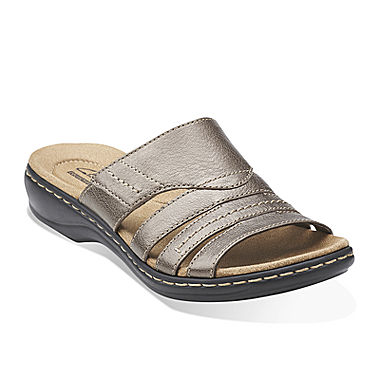

In [28]:
# using the 'find_product' function created previously to find the relevant product dictionary containing 
# the products key-value pair 
product = find_product('a1cba5df721a1b35f2c706ddb6b889a0')

# accessing the URL from the products dictionary and converting it to a string 
image_url = str(product['product_image_urls'])

# using the requests module to access and display the image 
img_data = requests.get(image_url, stream=True).raw

# displays an image of a shoe
display(Image.open(img_data))


# 11) List all the unique product categories

Find all the unique product categories mentioned in the `category` field of the products data and store them in a set. Print the contents of the set.

In [19]:
# creating an empty list called categories 
categories = []

# iterating through the dictionary and adding all the keys (the categories) to the 'categories' list 
for product in products_dicts:
    for k,v in product.items():
        if k == 'category':
            categories.append(v)

# transforming the 'categories' list to a set, which does not allow duplicates so all values in the set are unique
uniq_categories = set(categories)

print("The unique product categories are:")
# iterating through the set and displaying all items displayed within
for unique in uniq_categories:
    print(unique)

The unique product categories are:

jeans
dockers
all guys pants
balconette bras
beds
self-tanner for face
wides
tables
christmas tabletop
girls
izod
champion
boys sneakers
search-results
sunbeam
carts & islands
levi’s
easter
casual flats
trendy  tops
pretend play
pattern
view all guys shirts
pearl jewelry
blenders & juicers
decorative objects
women's pants
chi
batman vs. superman
view all
akademiks
girls dress shoes
pleated pants
canvas & boat shoes
jewelry boxes & armoires
comfort clogs & mules
straight
nursing bras
view all big & tall underwear & socks
levi’s 513™ slim straight
media
preschool (4-7x)
martha stewart
stackable rings
winter hats, scarves, gloves
tops & tees
free country
maidenform
fashion jewelry
jcpenney
dress pants
nail base coats & top coats
serveware
view all guys underwear & socks
wool blend coats
dishwashers
teen bedding
maxi dresses
nordicware
dale tiffany
sandals $30-$40
tops & t-shirts
sterling silver & silver plated
reversible belts
eye makeup
rosetti
night c

# 14) Read the csv files into a Data Frame

Read the three csv files into data frames called `products_pd`, `reviews_pd` and `users_pd`. Note that they all have a header row with field names.

Print the first 3 lines of each.

In [20]:
products_pd = pd.read_csv("products.csv")
# using the .loc property to access the first 3 rows of the dataframes 
display(products_pd.loc[0:2])

reviews_pd = pd.read_csv("reviews.csv")
display(reviews_pd.loc[0:2])

users_pd = pd.read_csv("users.csv")
display(users_pd.loc[0:2])

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625


,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...


,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho


# 15) Convert the Date of Birth field

Convert the DOB field in the users dataframe to a Pandas date object, rather than the string that it currently is stored as.

Re-display the top 3 rows of `users_pd`

In [21]:
from datetime import datetime

# checking that the DOB field in the dataframe is a string (object)
print(users_pd.dtypes)

print()

# converting the 'DOB' field in the dataframe to a pandas date object
users_pd['DOB'] = pd.to_datetime(users_pd['DOB'])

# checking that the DOB is now stored as a pandas date object (datetime64)
print(users_pd.dtypes)

# displaying the top 3 rows
display(users_pd.loc[0:2])

Username    object
DOB         object
State       object
dtype: object

Username            object
DOB         datetime64[ns]
State               object
dtype: object


,Username,DOB,State
0,bkpn1412,1983-07-31,Oregon
1,gqjs4414,1998-07-27,Massachusetts
2,eehe1434,1950-08-08,Idaho


# 16) Add a new user age column

Add a new column to `users_pd` that is the result of calculating their age today. Call the column `Age`

In [22]:
# setting the 'current date' variable to the current time and date
current_date = pd.Timestamp('now').now()

# removing 100 years from DOB whenever date of birth > now, as date format converts last two digits to years
users_pd['DOB'] = users_pd['DOB'].where(users_pd['DOB'] < current_date, users_pd['DOB'] -  np.timedelta64(100, 'Y'))

# subtracting DOB years from current date years, and only including the years part of the date
# Converting the 'Age' values to an integer to remove the decimal point
users_pd['Age'] = (current_date - users_pd['DOB']).astype('timedelta64[Y]').astype(int)

# displaying the head of the users_pd dataframe...
display(users_pd.head())

# ...and the tail, showing the 'Age' column
display(users_pd.tail())

,Username,DOB,State,Age
0,bkpn1412,1983-07-31,Oregon,38
1,gqjs4414,1998-07-27,Massachusetts,23
2,eehe1434,1950-08-08,Idaho,71
3,hkxj1334,1969-03-08,Florida,52
4,jjbd1412,2001-07-26,Georgia,20


,Username,DOB,State,Age
4995,mfnn1212,1997-07-27,Delaware,24
4996,ejnb3414,1976-01-08,Minnesota,46
4997,pdzw1433,1994-07-28,Ohio,27
4998,npha1342,1953-07-08,Montana,68
4999,yuoc2324,1975-02-08,South Dakota,46


# 17) Display the reviews for a t-shirt

Find all the reviews for the product with the unique id of `b28e5508c1b0022f47ae8c6f92c4cb6c`.

Display only the Username of the person who gave the review, the name of the product and the review text itself. There are three reviews for this product.


In [23]:
# merging 'products' and 'reviews' dataframes by combining a common column (uniq_id)
products_reviews = pd.merge(products_pd, reviews_pd, on='Uniq_id')

# then, merging the products and reviews combined dataframe (products_reviews) with 'users' reviews dataframe on a 
# common column (Username)
products_reviews_users = pd.merge(products_reviews, users_pd, on='Username')

# searching for a product unique id 
search_product = 'b28e5508c1b0022f47ae8c6f92c4cb6c'

# searches the new combined dataframe (products_reviews_users) for a Uniq_id matching the users input. 
# displays the username, name of the product and the review
product_review = products_reviews_users[(products_reviews_users.Uniq_id == search_product)][['Username','Name','Review']]

# displays the username, name of the product and the three reviews for the searched product
display(product_review)

,Username,Name,Review
17,krpz1113,Island Shores™ Graphic Tee,I bought this for my brother and he loves it.N...
32892,zdoz3242,Island Shores™ Graphic Tee,"The fit is somewhat loose, and I could not dis..."
35480,xxlw3134,Island Shores™ Graphic Tee,Pros: Cotton is one of the softest I have ever...


In [24]:
# displaying the reviews for a different item
search_product = 'b5e05a0fad52a646cf6786d5c8655276'

product_review = products_reviews_users[(products_reviews_users.Uniq_id == search_product)][['Username','Name','Review']]
display(product_review)

,Username,Name,Review
336,otgt4421,nickelodeon Teenage Mutant Ninja Turtles Twin/...,My little step grandchild loves his new turtle...
8531,efjv2144,nickelodeon Teenage Mutant Ninja Turtles Twin/...,My granddaughter loves her comforter. It is so...
14207,txqw4123,nickelodeon Teenage Mutant Ninja Turtles Twin/...,Not to heavy great light weight washable very ...
15922,afbn4241,nickelodeon Teenage Mutant Ninja Turtles Twin/...,My 3 year old grandson has all the Ninja Turtl...
17632,htjy1423,nickelodeon Teenage Mutant Ninja Turtles Twin/...,This is perfect for smaller kids as it is ligh...
18852,cddh2334,nickelodeon Teenage Mutant Ninja Turtles Twin/...,Loved the sheets ! They were a Christmas prese...
20069,oixx4424,nickelodeon Teenage Mutant Ninja Turtles Twin/...,"Thanks, Penneys, for having this sheet set ! T..."
20075,oinj3142,nickelodeon Teenage Mutant Ninja Turtles Twin/...,My daughter loves it. It is warm and comfortab...
20079,pnzh4122,nickelodeon Teenage Mutant Ninja Turtles Twin/...,My daughter got this product for Christmas and...


# 18) Add Something of Your Own

Look at the data that we provided with this assessment and think of something interesting to do with it using whatever libraries and new data you like. Describe what you decide to do with the data and why it might be interesting or useful to the company to do it.

You can augment the data we have provided with additional data if you need to. Produce working code to implement your ideas in as many cells as you need below.

For a first class grade, this part of the assignment must show originality, creative thinking, and insights beyond what you've been taught directly on the module.

# Products Report

As a Data Science for Business student, exploratory data analysis is important for providing clear and understandable data to 
companies for decision making. To help with this, i will show how the sweetviz package can be used alongside pandas dataframes
to provide clear information and analysis from selected dataframes.
Using sweetviz also allows comparisons for targets, for companies to compare how their current data aligns with their targets and goals 


                                             |                                             | [  0%]   00:00 ->…


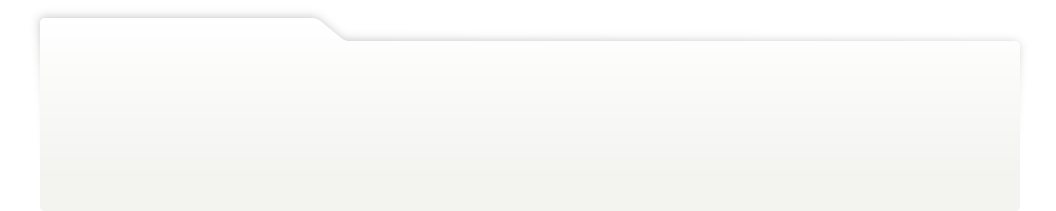
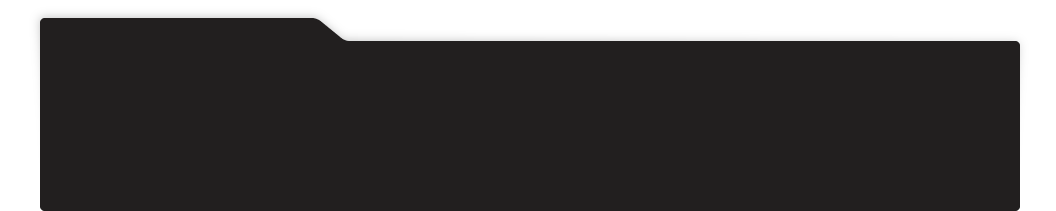
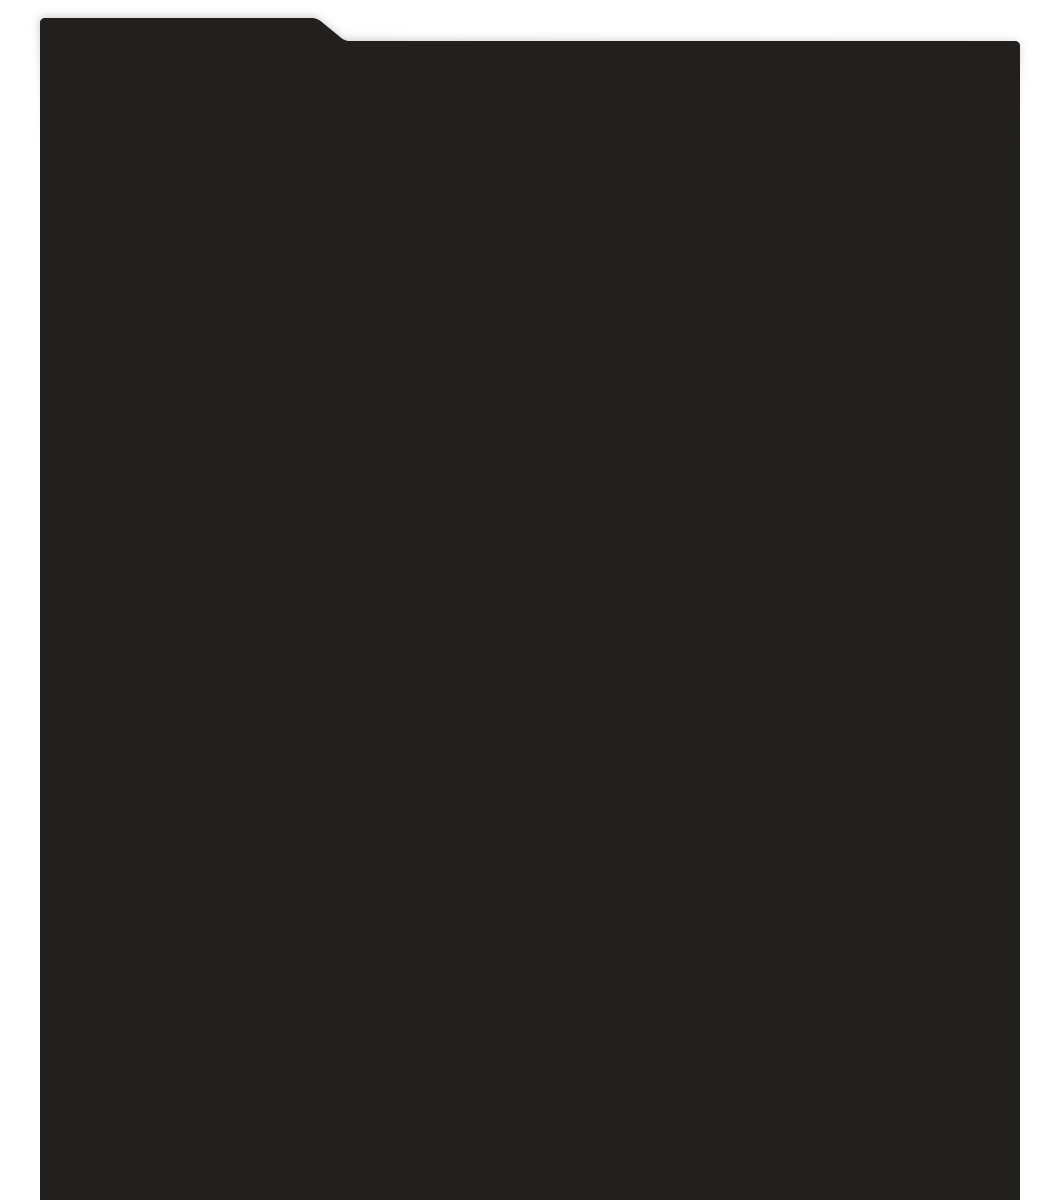
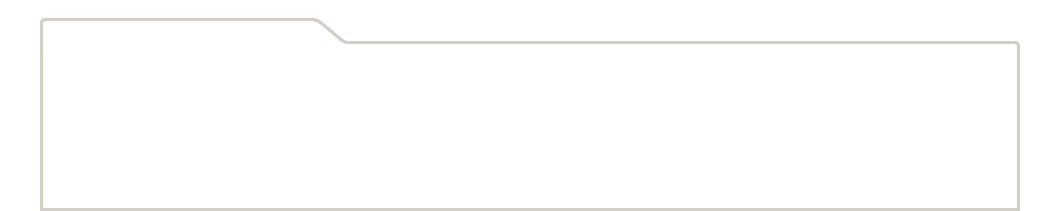
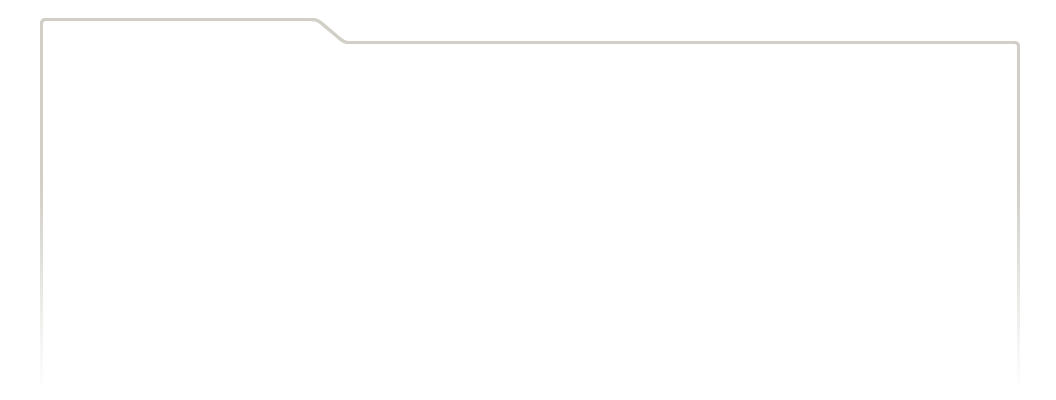
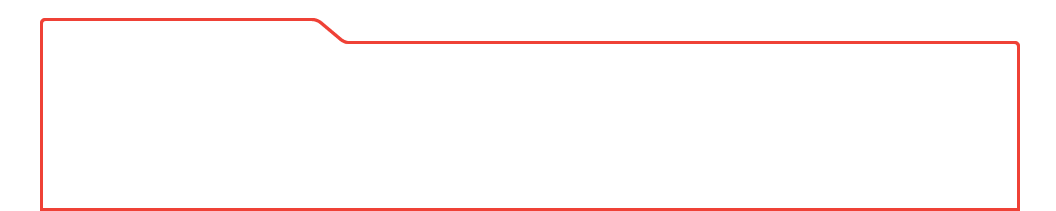
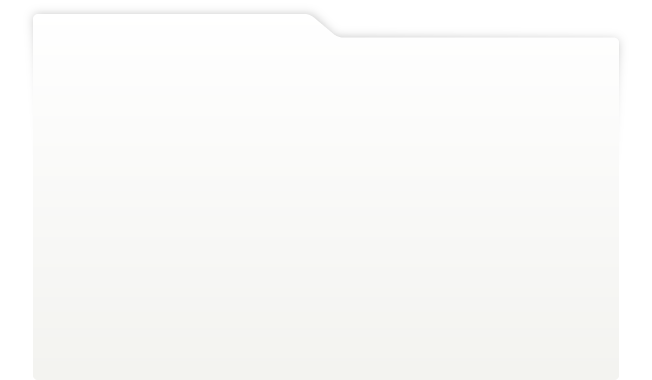
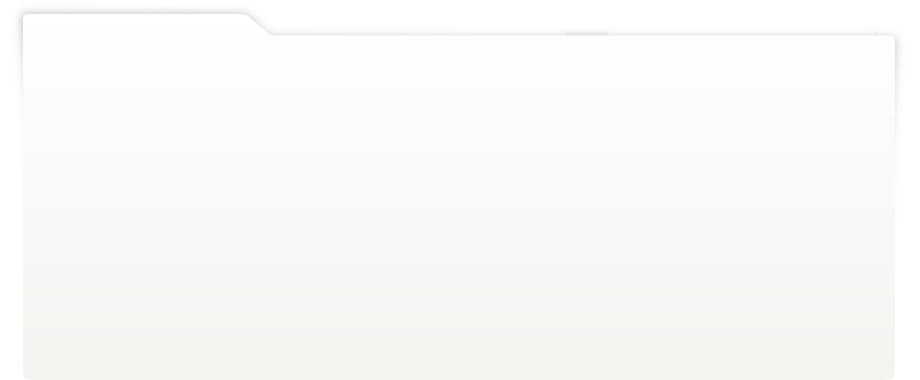
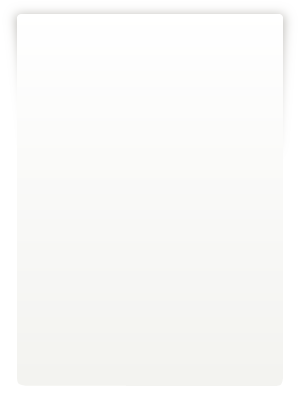
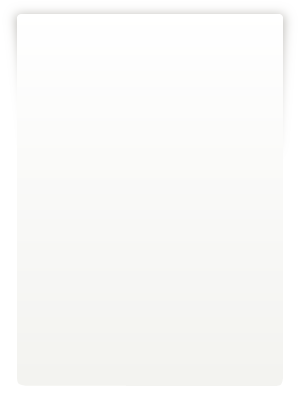
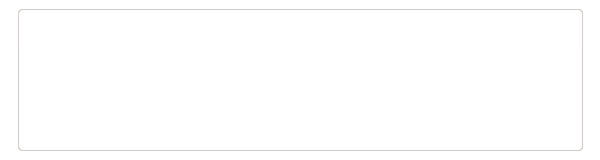
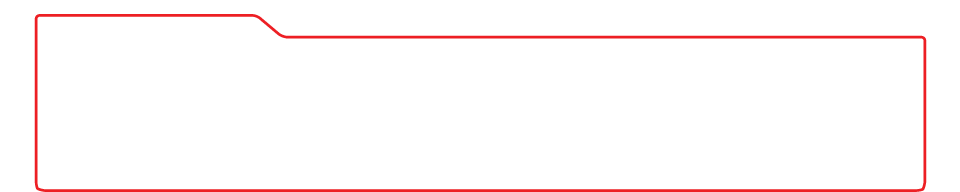
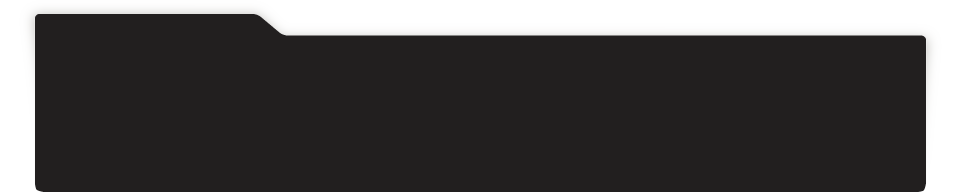
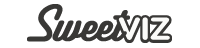
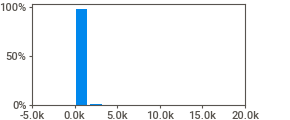
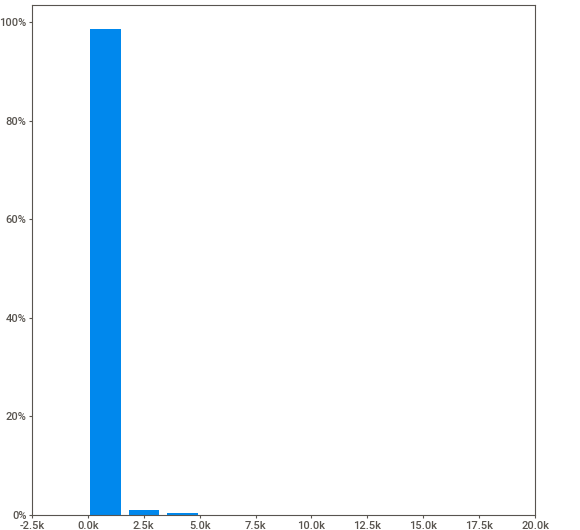
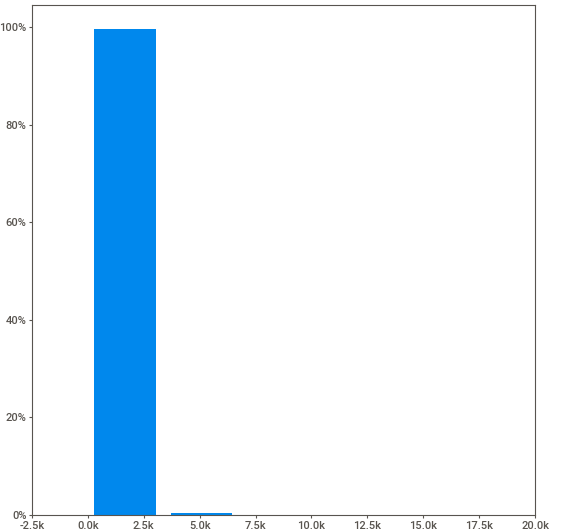
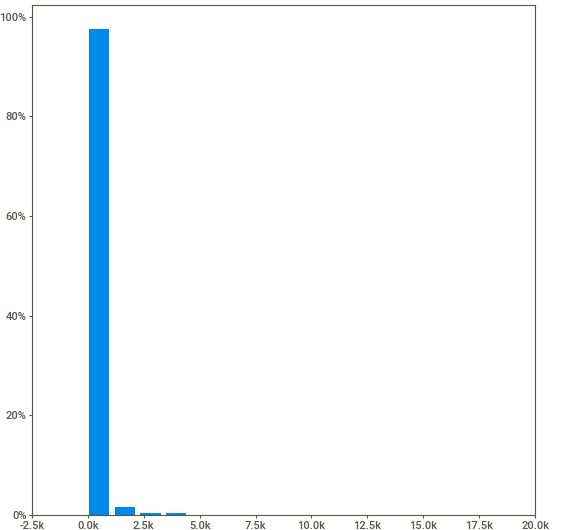
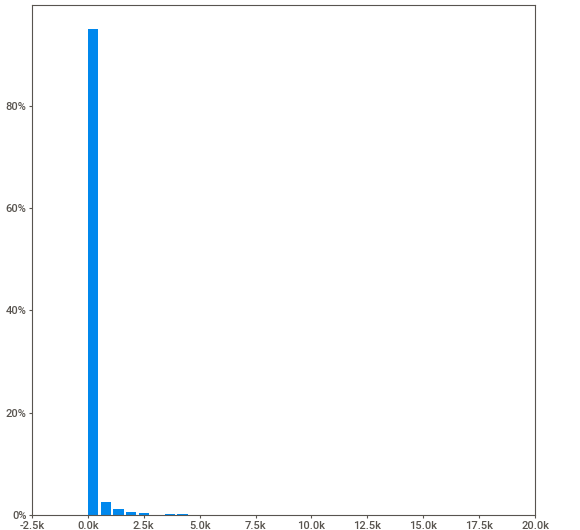
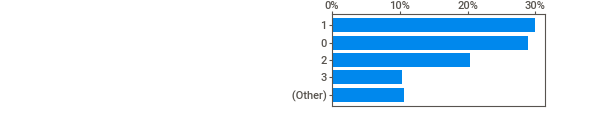
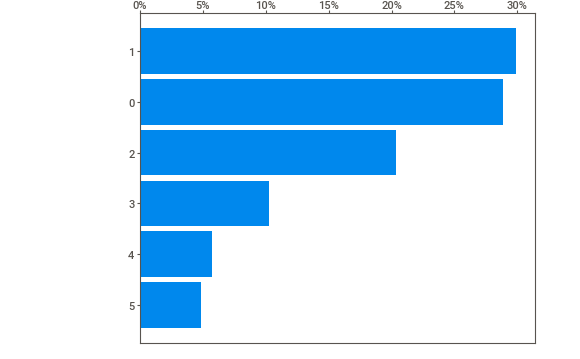
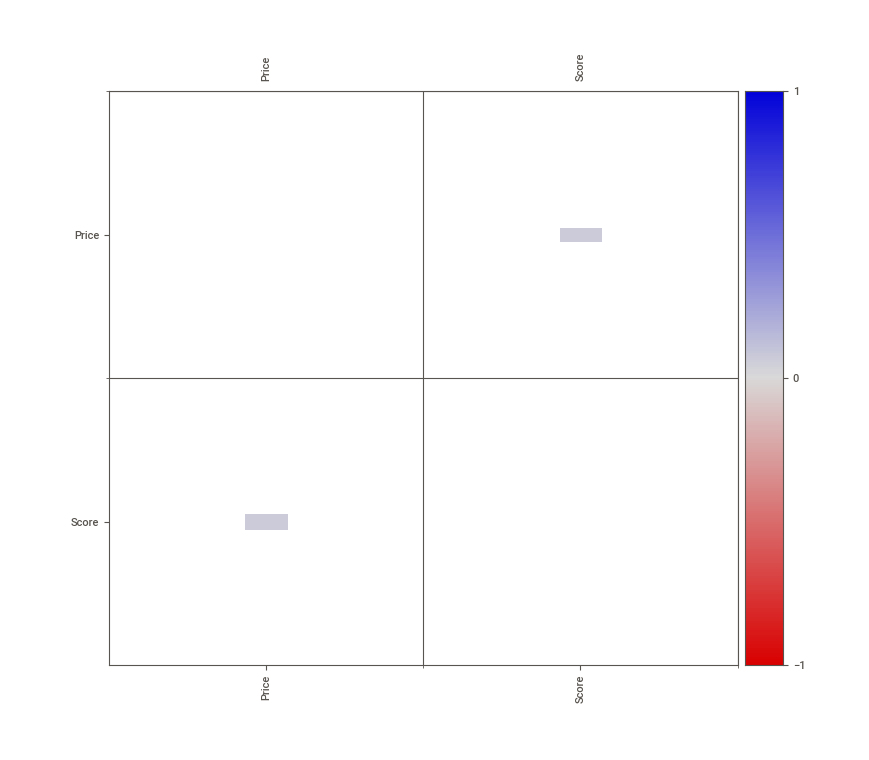
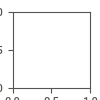

Report 'Products Exploratory Data Analysis' was saved to storage.


In [25]:
# importing the package 
import sweetviz as sv

# performaing exploratory data analysis on product information using selected columns in the dataframe
# selecting these three columns to provide information for the company on the product name, its price and the score it receives 
product_EDA = products_reviews_users[['Name','Price','Score']]

# analysing the selected variables in the dataframe and displaying the sweetviz report
products_report = sv.analyze(product_EDA)
products_report.show_notebook(filepath='Products Exploratory Data Analysis',layout='vertical')

# Interpreting the  Products EDA:

    - There was a total of 39,080 purchases
    - 144 Clarks Leisa Grove leather sandals and 67 Arizona Harbour boat shoes were sold.
    - The most expensive product costs £17,122 (only 1 sold), and the average price for the products is £148.
    - The most common amount spent on a product was £60.43.
    - The most common scores given for the products was 0 (29% of the ratings) and 1 (30% of the ratings).

# Customer Report

It would be equally important for companies to be able to analyse customer data to consider any purchasing trends by age or by location 


                                             |                                             | [  0%]   00:00 ->…


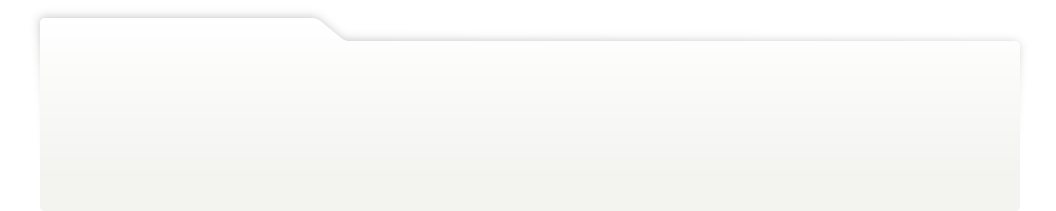
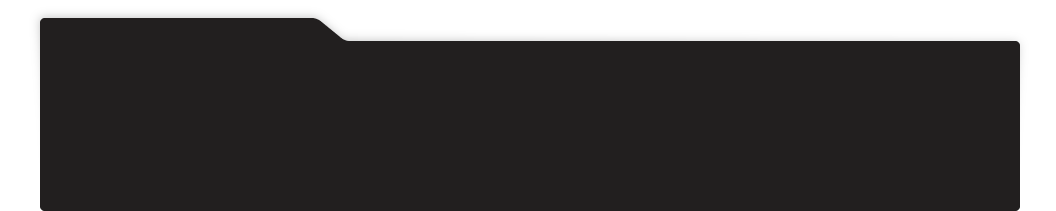
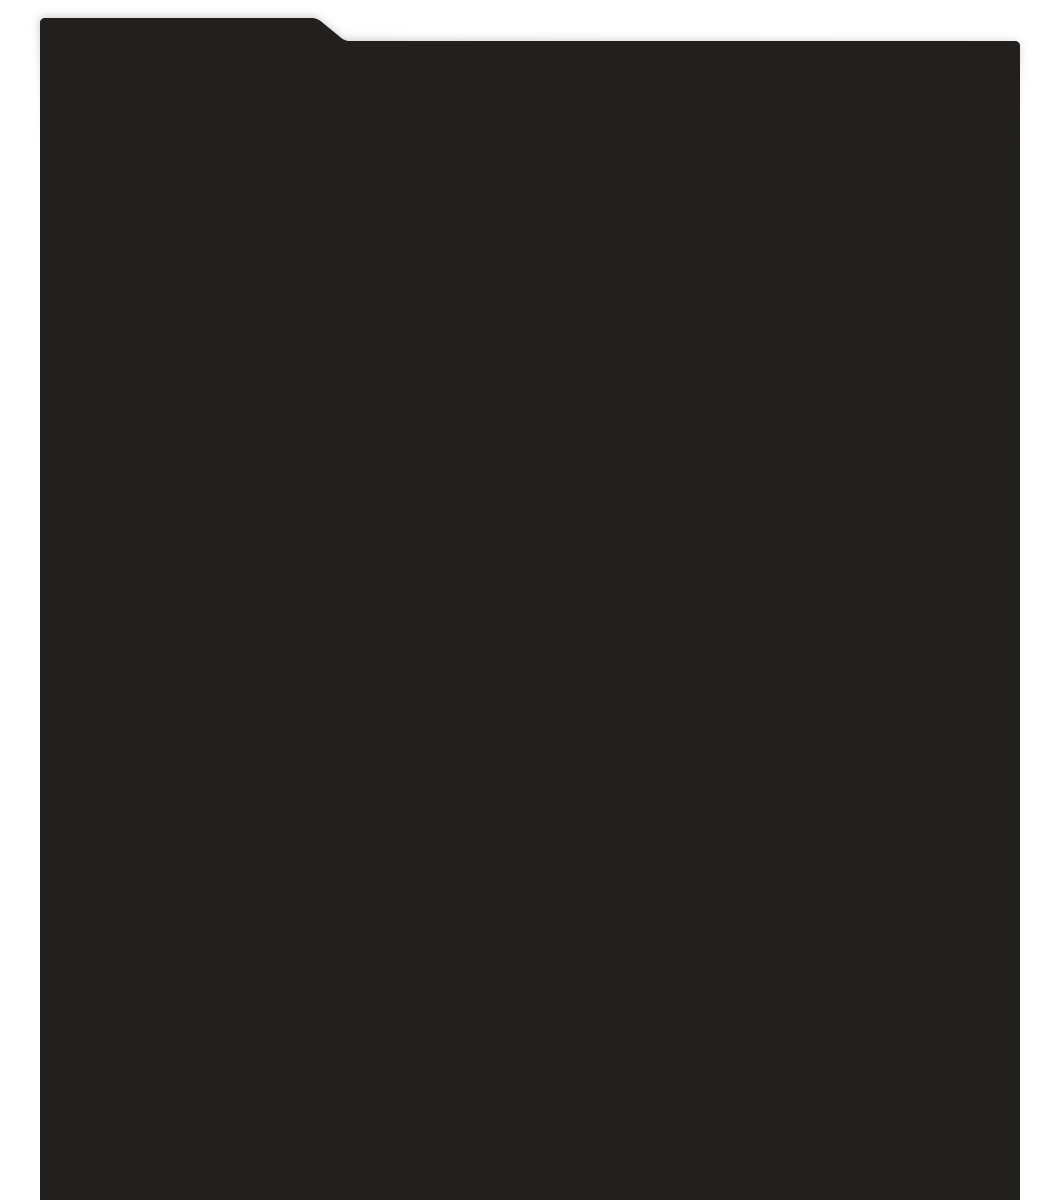
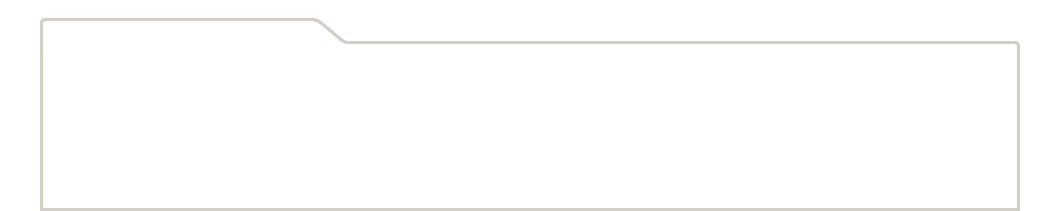
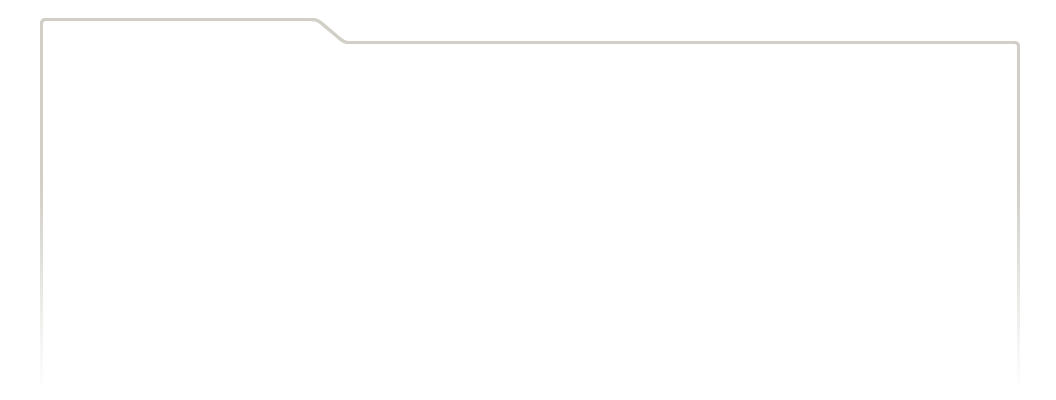
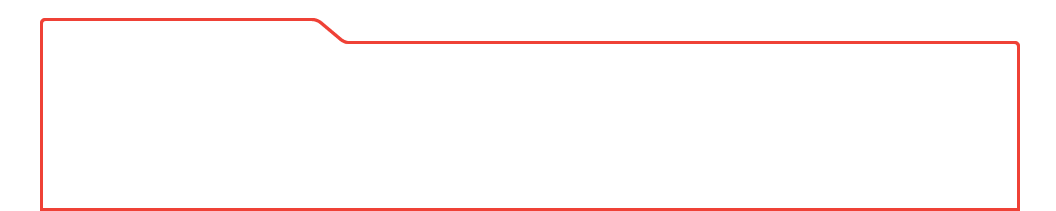
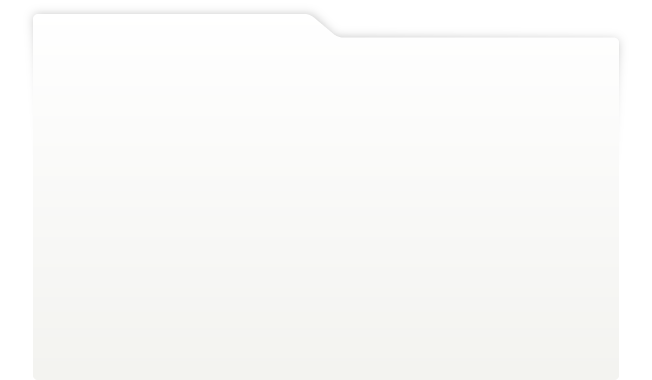
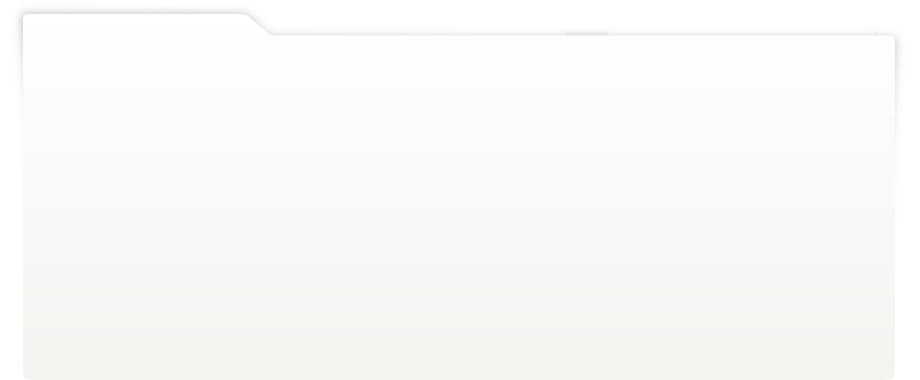
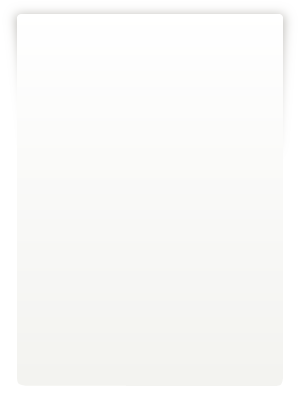
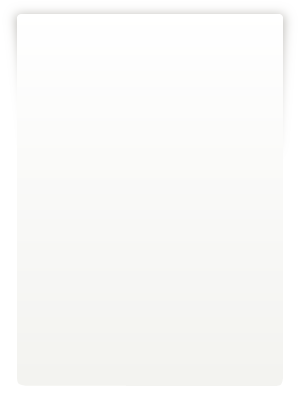
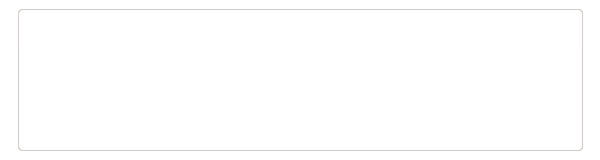
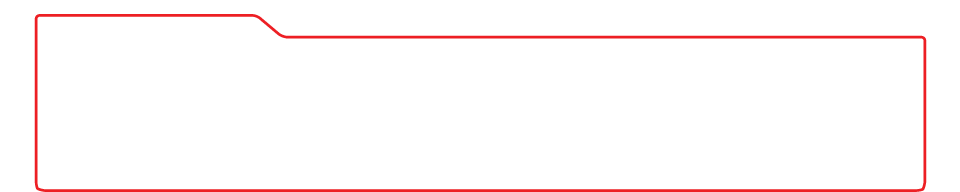
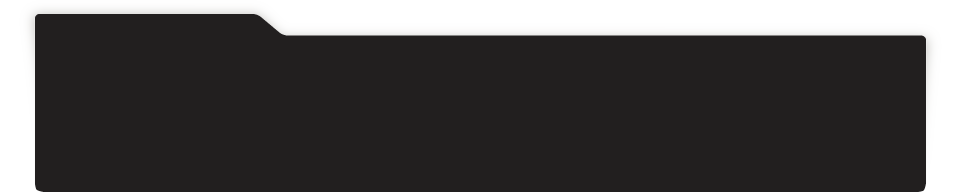
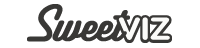
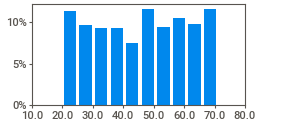
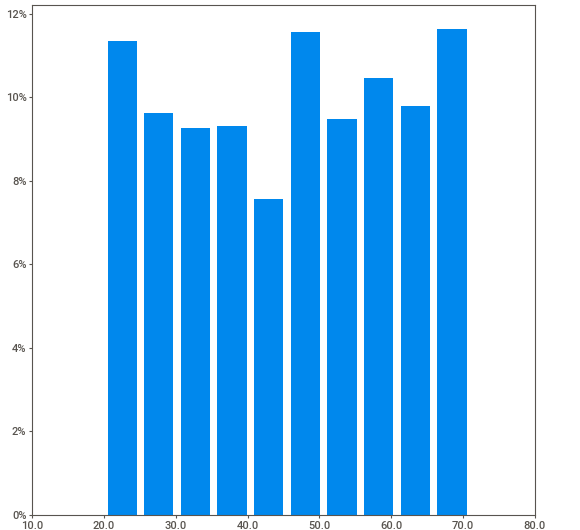
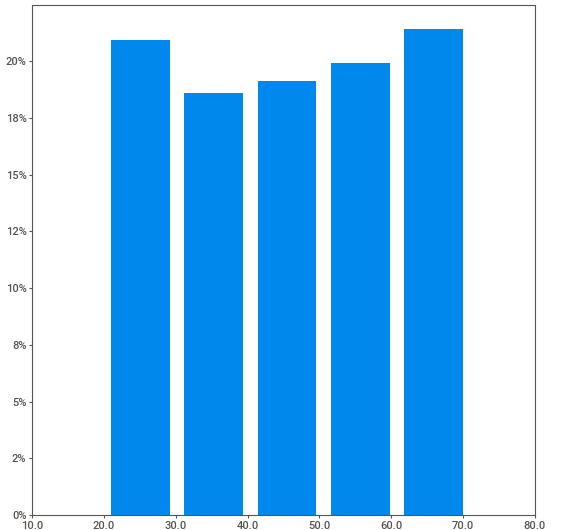
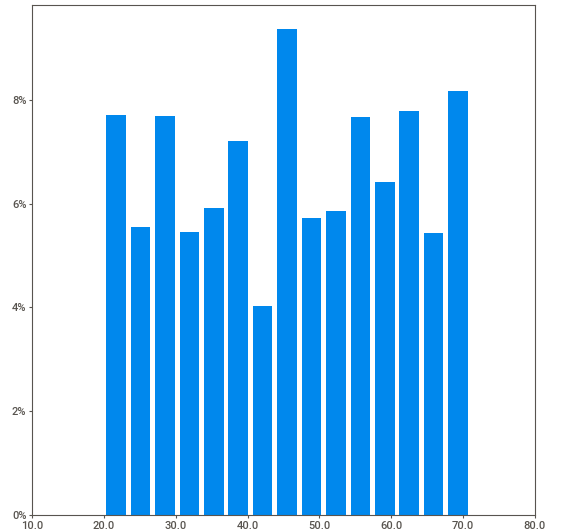
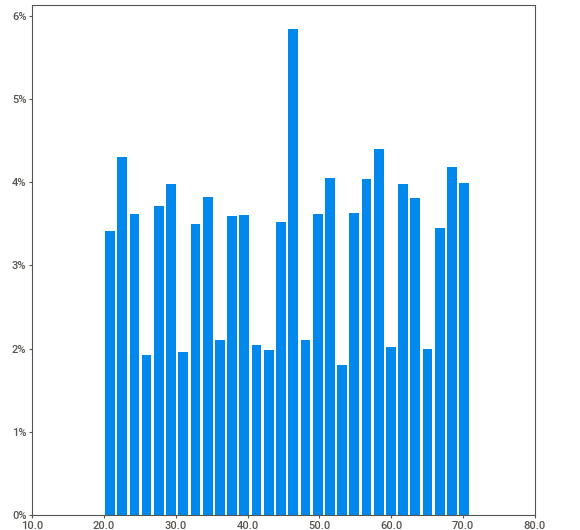
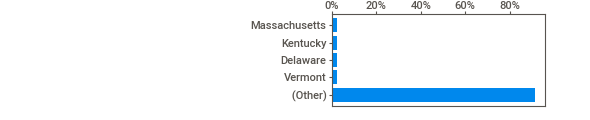
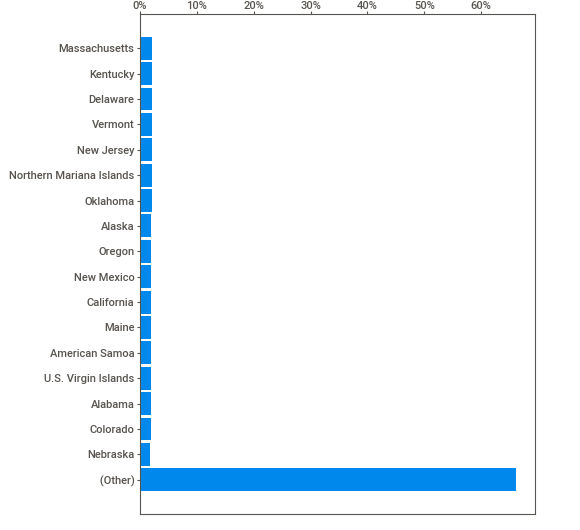
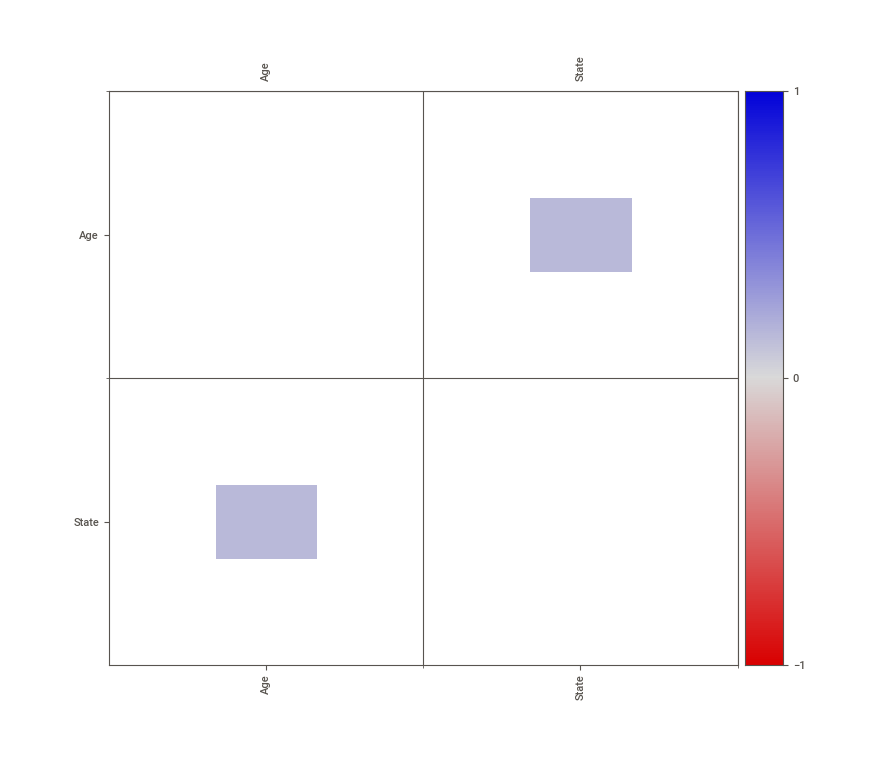
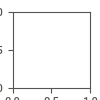

Report 'Customers Exploratory Data Analysis' was saved to storage.


In [26]:
# including the username, age and state data from the dataframe 

customer_EDA = products_reviews_users[['Username','Age','State']]
customers_report = sv.analyze(customer_EDA)
customers_report.show_notebook(filepath='Customers Exploratory Data Analysis',layout='vertical')

# Interpreting the Customers report:

    - The user 'dqft3311' bought the most products with 34.
    - The oldest user is 71, while the youngest is 20. The average age is 45.8 years.
    - The most common ages of users is 58, 22, 68 and 61.
    - The states that the users were from varied quite signficiantly, but most of the users were from Massachuseets (850) or Kentucky (845).